In [76]:
import datetime
import math
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [77]:
football_tweets = pd.read_csv("./data/football_tweets.csv")

In [78]:
football_tweets.head()

,Unnamed: 0,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERID,USERSCREENNAME,...,LOCATION,HASHTAGS,ISRETWEET,datetime,Cluster,parsed_tweets,stemmed_tokens,is_new_years_tweet,is_eastender_tweet,is_football_tweet
0,0,550226818624942080,NaN,-0.262150,51.391407,-0.262150,51.391407,31/12/2014 09:47:50,113918054,12Elbestreet,...,Kingston upon Thames,NaN,0,2014-12-31 09:47:50,1,Not yet got tics for Liverpool waiting till Fr...,"['not', 'yet', 'got', 'tic', 'for', 'liverpool...",False,False,True
1,61,550211786700750849,NaN,-0.272859,51.398660,-0.272859,51.398659,31/12/2014 08:48:07,1348662787,Deccers_8,...,Kingston upon Thames,ssnhqSchurrle,0,2014-12-31 08:48:07,1,The Build Up The Pass The Goal Best For Me,"['the', 'build', 'Up', 'the', 'pass', 'the', '...",False,False,True
2,128,550252286908596224,NaN,-0.295655,51.384080,-0.295655,51.384079,31/12/2014 11:29:03,121374134,aewparsons,...,Kingston upon Thames,lessonslearned,0,2014-12-31 11:29:03,1,Hope ECB is watching Only play T blast matches...,"['hope', 'ecb', 'is', 'watch', 'onli', 'play',...",False,False,True
3,147,550245732125777920,NaN,-0.257089,51.406690,-0.257089,51.406689,31/12/2014 11:03:00,1530791,niallomalley,...,Kingston upon Thames,NaN,0,2014-12-31 11:03:00,1,Hi Tom any sign of an update from the attendin...,"['Hi', 'tom', 'ani', 'sign', 'of', 'an', 'upda...",False,False,True
4,257,550317344313344000,NaN,-0.305016,51.369930,-0.305016,51.369930,31/12/2014 15:47:33,335423694,_rachelanstee,...,Kingston upon Thames,NaN,0,2014-12-31 15:47:33,1,Decided in advance that on valentines day I m ...,"['decid', 'in', 'advanc', 'that', 'on', 'valen...",False,False,True


In [79]:
data = football_tweets[["X", "Y", "LOCATION", "Cluster", "parsed_tweets", "MESSAGEDATE","datetime"]]

In [80]:
data.head()

,X,Y,LOCATION,Cluster,parsed_tweets,MESSAGEDATE,datetime
0,-0.262150,51.391407,Kingston upon Thames,1,Not yet got tics for Liverpool waiting till Fr...,31/12/2014 09:47:50,2014-12-31 09:47:50
1,-0.272859,51.398660,Kingston upon Thames,1,The Build Up The Pass The Goal Best For Me,31/12/2014 08:48:07,2014-12-31 08:48:07
2,-0.295655,51.384080,Kingston upon Thames,1,Hope ECB is watching Only play T blast matches...,31/12/2014 11:29:03,2014-12-31 11:29:03
3,-0.257089,51.406690,Kingston upon Thames,1,Hi Tom any sign of an update from the attendin...,31/12/2014 11:03:00,2014-12-31 11:03:00
4,-0.305016,51.369930,Kingston upon Thames,1,Decided in advance that on valentines day I m ...,31/12/2014 15:47:33,2014-12-31 15:47:33


In [88]:
data = data[(data.datetime >= "2015-01-01 19:00") & (data.datetime < "2015-01-01 20:00")]

In [89]:
data["datetime"] = data["datetime"].apply(pd.to_datetime)
# data["ts"] = data.datetime.values.astype(np.int64) // 10 ** 9

# cluster["norm_space"] = (cluster.Space - cluster.Space.min()) / (cluster.Space.max() - cluster.Space.min())
# cluster["norm_row"] = (cluster.Row - cluster.Row.min()) / (cluster.Row.max() - cluster.Row.min())
# data["norm_ts"] = (data.ts - data.ts.min()) / (data.ts.max() - data.ts.min())

clusters = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=clusters, s=6)
ax.view_init(30, 185)
plt.show()

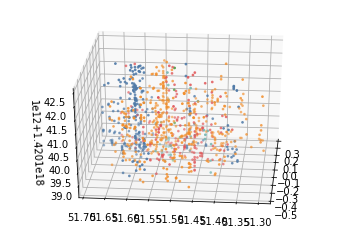

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster in data.Cluster.unique():
    
    x = data[data.Cluster == cluster].X
    y = data[data.Cluster == cluster].Y
    z = data[data.Cluster == cluster].datetime
    ax.scatter(x, y, z, c=clusters[cluster], s=3)

ax.view_init(30, 185)
plt.show()